<Axes: ylabel='flen'>

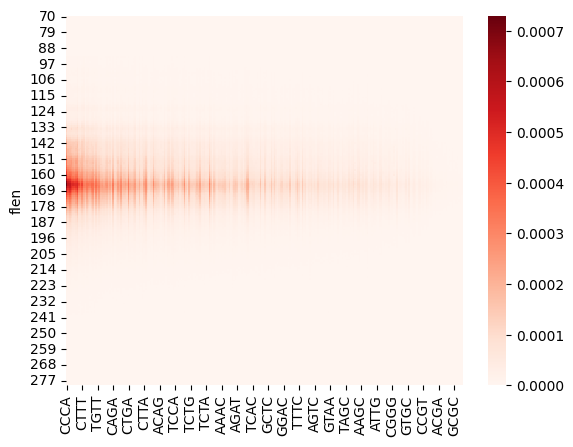

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

input_data = "/Volumes/HNSD02/outdir/ecd_wgs_features/39-ZHMGAAA15NB_S95061-S97061.final_output.tsv"

maindf = pd.read_csv(input_data, sep = "\t", header = None)
maindf = maindf[[0, 1, 2, 3, 4, 8, 9, 10, 11, 12]]
maindf.columns = ["readID", "chrom", "start", "cigar", "flen", "readID_extra", "forward_NUC", "reverse_NUC", "forward_EM", "reverse_EM"]
maindf = maindf.dropna()
maindf["forward_EM"] = maindf["forward_EM"].apply(lambda x: x.upper())
maindf["reverse_EM"] = maindf["reverse_EM"].apply(lambda x: x.upper())

maindf = maindf[(maindf["flen"] >= 70) & (maindf["flen"] <= 280)]

##### filter
maindf_short = maindf[maindf["flen"] <= 150]
maindf_long = maindf[maindf["flen"] > 150]

##### generate EM - FLEN dataframe
forward_em_flen = maindf[["forward_EM", "flen"]].copy()
forward_em_flen.columns = ["EM", "flen"]
reverse_em_flen = maindf[["reverse_EM", "flen"]].copy()
reverse_em_flen.columns = ["EM", "flen"]
em_flen_df = pd.concat([forward_em_flen, reverse_em_flen], axis = 0)
em_flen_df = em_flen_df[~em_flen_df["EM"].str.contains("N")]
countdf = em_flen_df.reset_index().groupby(["EM", "flen"])["index"].count().reset_index().pivot_table(index='flen', columns='EM', values='index', fill_value=0)

##### fill values so that the output matrix always 50:350 x 256
flen_range_df = pd.DataFrame({'flen': range(70, 280)})
countdf = pd.merge(flen_range_df, countdf, on='flen', how='outer')
countdf.fillna(0, inplace=True)

all_4bp_motifs = ["{}{}{}{}".format(i,j,k,l) for i in ["A", "T", "G", "C"] for j in ["A", "T", "G", "C"] for k in ["A", "T", "G", "C"] for l in ["A", "T", "G", "C"]]
countdf = countdf.set_index("flen")
missing_motifs = [item for item in countdf.columns if item not in all_4bp_motifs]

if len(missing_motifs) != 0:
    for motif in missing_motifs:
        countdf[motif] = 0


# motif_order = countdf.sum().reset_index().sort_values(by = 0, ascending=False)["index"].values
# pd.DataFrame(data = motif_order, columns = ["motif_order"]).to_csv("motif_order.csv")
motif_order = pd.read_csv("motif_order.csv")["motif_order"].values
        
scaled_countdf = countdf/countdf.sum().sum()
sns.heatmap(scaled_countdf[motif_order], cmap = "Reds")


In [2]:
nucdf_reverse = maindf[["flen", "reverse_NUC"]].copy()
nucdf_reverse.columns = ["flen", "nuc_dist"]

nucdf_forward = maindf[["flen", "forward_NUC"]].copy()
nucdf_forward.columns = ["flen", "nuc_dist"]
nucdf = pd.concat([nucdf_forward, nucdf_reverse], axis = 0)
nucdf = nucdf[(nucdf["nuc_dist"] <= 300) & (nucdf["nuc_dist"] >= -300)]

<Axes: ylabel='flen'>

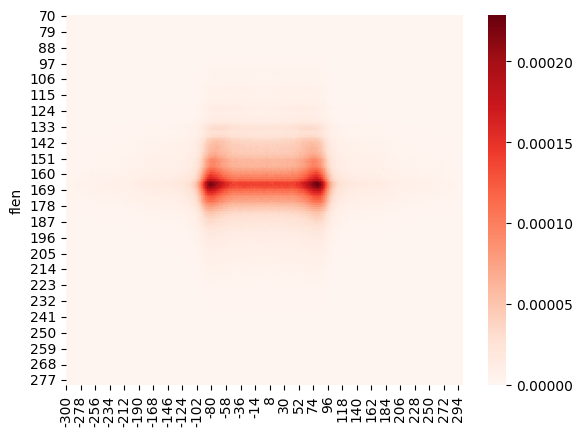

In [3]:
nuc_countdf = nucdf.reset_index().groupby(["nuc_dist", "flen"])["index"].count().reset_index().pivot_table(index='flen', columns='nuc_dist', values='index', fill_value=0)
flen_range_df = pd.DataFrame({'flen': range(70, 280)})
nuc_countdf = pd.merge(flen_range_df, nuc_countdf, on='flen', how='outer')
nuc_countdf.fillna(0, inplace=True)
nuc_countdf = nuc_countdf.set_index("flen")

nuc_countdf = nuc_countdf/nuc_countdf.sum().sum()

sns.heatmap(nuc_countdf, cmap = "Reds")


<Axes: xlabel='reverse_EM', ylabel='forward_EM'>

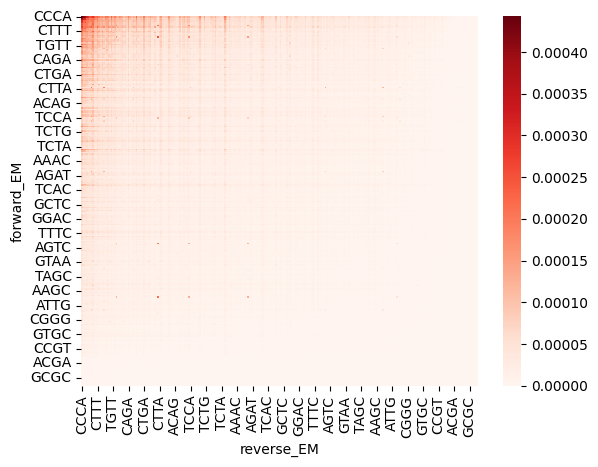

In [4]:
count_pair_EM = maindf[(~ maindf["reverse_EM"].str.contains("N")) & (~maindf["forward_EM"].str.contains("N"))].groupby(["forward_EM", "reverse_EM"])["readID"].count().reset_index().reset_index().pivot_table(index='forward_EM', columns='reverse_EM', values='readID', fill_value=0)

count_pair_EM = count_pair_EM/count_pair_EM.sum().sum()
sns.heatmap(count_pair_EM.loc[motif_order][motif_order], cmap = "Reds")

<Axes: xlabel='reverse_EM', ylabel='forward_EM'>

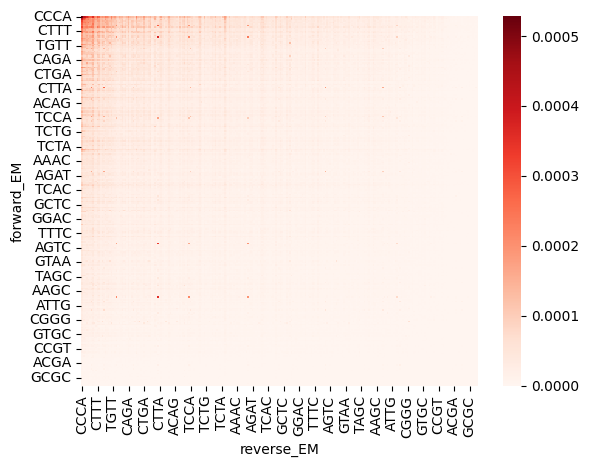

In [5]:
count_pair_EM = maindf_short[(~ maindf_short["reverse_EM"].str.contains("N")) & (~maindf_short["forward_EM"].str.contains("N"))].groupby(["forward_EM", "reverse_EM"])["readID"].count().reset_index().reset_index().pivot_table(index='forward_EM', columns='reverse_EM', values='readID', fill_value=0)

count_pair_EM = count_pair_EM/count_pair_EM.sum().sum()
sns.heatmap(count_pair_EM.loc[motif_order][motif_order], cmap = "Reds")

<Axes: xlabel='reverse_EM', ylabel='forward_EM'>

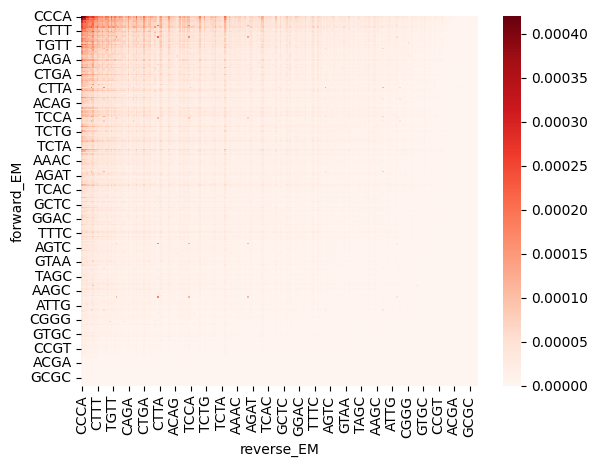

In [6]:
count_pair_EM = maindf_long[(~ maindf_long["reverse_EM"].str.contains("N")) & (~maindf_long["forward_EM"].str.contains("N"))].groupby(["forward_EM", "reverse_EM"])["readID"].count().reset_index().reset_index().pivot_table(index='forward_EM', columns='reverse_EM', values='readID', fill_value=0)

count_pair_EM = count_pair_EM/count_pair_EM.sum().sum()
sns.heatmap(count_pair_EM.loc[motif_order][motif_order], cmap = "Reds")

<Axes: ylabel='forward_NUC'>

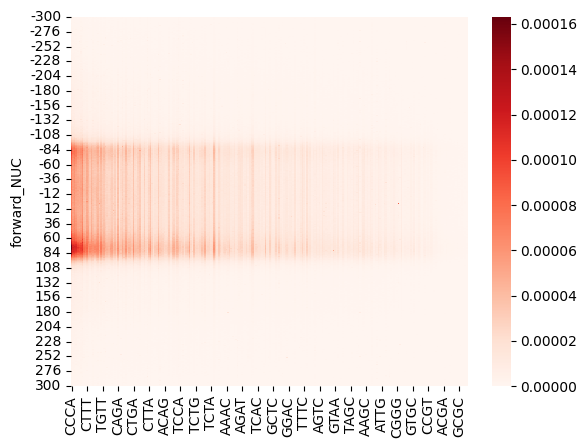

In [7]:
##### generate EM - forward_NUC dataframe
forward_em_forward_NUC = maindf[["forward_EM", "forward_NUC"]].copy()
forward_em_forward_NUC.columns = ["EM", "forward_NUC"]
reverse_em_forward_NUC = maindf[["reverse_EM", "forward_NUC"]].copy()
reverse_em_forward_NUC.columns = ["EM", "forward_NUC"]
em_forward_NUC_df = pd.concat([forward_em_forward_NUC, reverse_em_forward_NUC], axis = 0)
em_forward_NUC_df = em_forward_NUC_df[~em_forward_NUC_df["EM"].str.contains("N")]
em_forward_NUC_df = em_forward_NUC_df[(em_forward_NUC_df["forward_NUC"] >= -300) & (em_forward_NUC_df["forward_NUC"] <= 300)]
countdf = em_forward_NUC_df.reset_index().groupby(["EM", "forward_NUC"])["index"].count().reset_index().pivot_table(index='forward_NUC', columns='EM', values='index', fill_value=0)

##### fill values so that the output matrix always 50:350 x 256
forward_NUC_range_df = pd.DataFrame({'forward_NUC': range(70, 280)})
countdf = pd.merge(forward_NUC_range_df, countdf, on='forward_NUC', how='outer')
countdf.fillna(0, inplace=True)

all_4bp_motifs = ["{}{}{}{}".format(i,j,k,l) for i in ["A", "T", "G", "C"] for j in ["A", "T", "G", "C"] for k in ["A", "T", "G", "C"] for l in ["A", "T", "G", "C"]]
countdf = countdf.set_index("forward_NUC")
missing_motifs = [item for item in countdf.columns if item not in all_4bp_motifs]

if len(missing_motifs) != 0:
    for motif in missing_motifs:
        countdf[motif] = 0
countdf = countdf/countdf.sum().sum()
sns.heatmap(countdf[motif_order], cmap = "Reds")


<Axes: ylabel='reverse_NUC'>

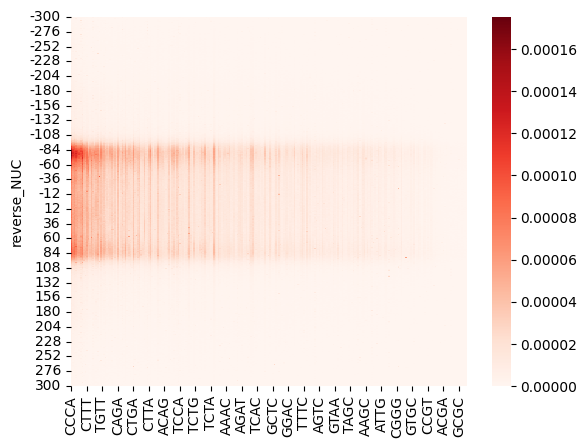

In [8]:
##### generate EM - reverse_NUC dataframe
reverse_EM_reverse_NUC = maindf[["reverse_EM", "reverse_NUC"]].copy()
reverse_EM_reverse_NUC.columns = ["EM", "reverse_NUC"]
reverse_em_reverse_NUC = maindf[["reverse_EM", "reverse_NUC"]].copy()
reverse_em_reverse_NUC.columns = ["EM", "reverse_NUC"]
em_reverse_NUC_df = pd.concat([reverse_EM_reverse_NUC, reverse_em_reverse_NUC], axis = 0)
em_reverse_NUC_df = em_reverse_NUC_df[~em_reverse_NUC_df["EM"].str.contains("N")]
em_reverse_NUC_df = em_reverse_NUC_df[(em_reverse_NUC_df["reverse_NUC"] >= -300) & (em_reverse_NUC_df["reverse_NUC"] <= 300)]
countdf = em_reverse_NUC_df.reset_index().groupby(["EM", "reverse_NUC"])["index"].count().reset_index().pivot_table(index='reverse_NUC', columns='EM', values='index', fill_value=0)

##### fill values so that the output matrix always 50:350 x 256
reverse_NUC_range_df = pd.DataFrame({'reverse_NUC': range(70, 280)})
countdf = pd.merge(reverse_NUC_range_df, countdf, on='reverse_NUC', how='outer')
countdf.fillna(0, inplace=True)

all_4bp_motifs = ["{}{}{}{}".format(i,j,k,l) for i in ["A", "T", "G", "C"] for j in ["A", "T", "G", "C"] for k in ["A", "T", "G", "C"] for l in ["A", "T", "G", "C"]]
countdf = countdf.set_index("reverse_NUC")
missing_motifs = [item for item in countdf.columns if item not in all_4bp_motifs]

if len(missing_motifs) != 0:
    for motif in missing_motifs:
        countdf[motif] = 0
countdf = countdf/countdf.sum().sum()
sns.heatmap(countdf[motif_order], cmap = "Reds")
